<a href="https://colab.research.google.com/github/Piyush42Soni/Calculator_app/blob/main/first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [58]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [59]:
len(X_train)
X_train=X_train/255
X_test=X_test/255

In [60]:
len(X_test)

10000

In [61]:
X_train[0].shape

(28, 28)

In [62]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

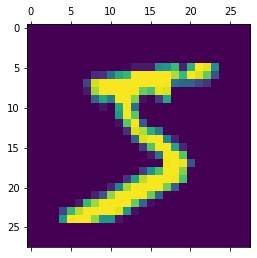

In [63]:
plt.matshow(X_train[0])

In [64]:
Y_train[2]

4

In [65]:
X_train.shape

(60000, 28, 28)

In [66]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [73]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, input_shape=(100,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2747 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1267 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0683 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9834


In [74]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9742


[0.08540862798690796, 0.9742000102996826]

In [75]:
y=model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [76]:
np.argmax(y[0])
y_predict=[np.argmax(i) for i in y]
y_predict[:5]

[7, 2, 1, 0, 4]

In [77]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predict)

Text(69.0, 0.5, 'Truth')

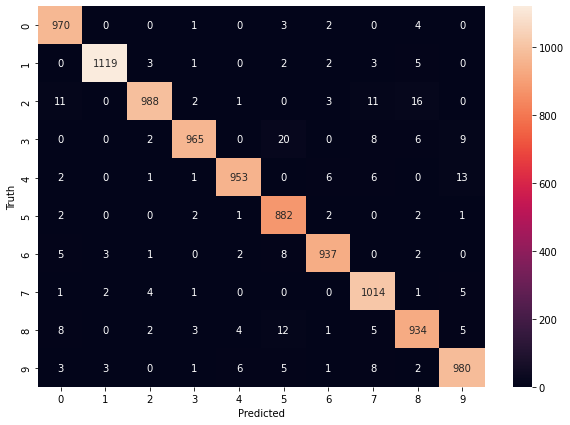

In [78]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')